#### 실습 과제
mtcars.csv 데이터 셋에서 mpg 예측모델을 생성하기 위해 필요한 전처리 및 탐색적 분석을 수행한 결과로 데이터셋을 도출한 후 주어진 모델링 및 평가코드를 적용하여 결과를 출력하세요.

[데이터 셋 변수 설명]

- mpg: 연비(miles per gallon)
- cyl: 실린더 개수(number of cylinders)
- disp: 배기량(displacement)
- hp: 마력(horsepower)
- drat: 후륜비(rear axle ratio)
- wt: 차량 무게(weight)
- qsec: 1/4 마일 달성 시간(1/4 mile time)
- vs: 엔진 형태(V/S)
- am: 변속기 종류(automatic or manual)
- gear: 기어 수(number of gears)
- carb: 기화기 개수(number of carburetors)


#### 1) 데이터불러오기 > info() > 결측치,문제,컬럼,데이터타입, 통계적요약, describe, value_counts, unique >
#### 2) 변수선택 : 중요변수 탐색 > 상관관계, 변수분포(종속,독립변수 간 값 높을수록 좋음) (독립변수간 값 낮을수록 좋음) > 탐색적 분석 추가(파생변수 vs 종속변수 상관관계) >
#### 3) 데이터셋 제작 : 표준화, 정규화 > 분석용 데이터셋에 적용

#### 연비(mpg)를 측정하는데 다른 컬럼들과의 상관관계를 찾기 + 알고리즘에 적용할 수 있는 데이터셋을 만들기.
#### 데이터탐색, 전처리

In [6]:
# 모델 구축 - 데이터셋 품질 확인용
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#데이터 불러오기
file_path= '/content/drive/MyDrive/kdt_240424/m3_분석라이브러리/pandas/dataset/mtcars.csv' #드라이브 마운트 불러오기.
# file_path = 'mtcars.csv' # 선택 파일 불러오기.
df = pd.read_csv(file_path,index_col=0)

df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


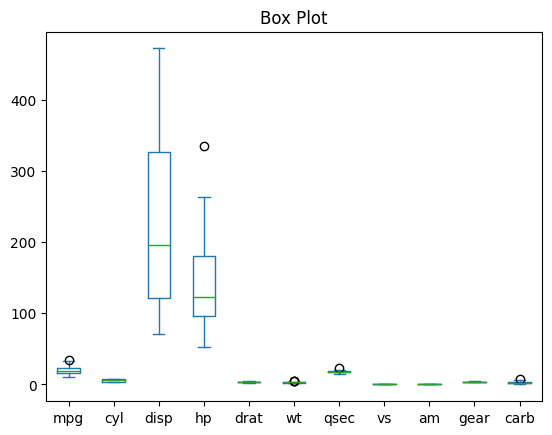

In [9]:
df.plot.box()
# df.boxplot(columns='mpg') # 칼럼 하나만 확인할때
plt.title('Box Plot')
plt.show()

In [13]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

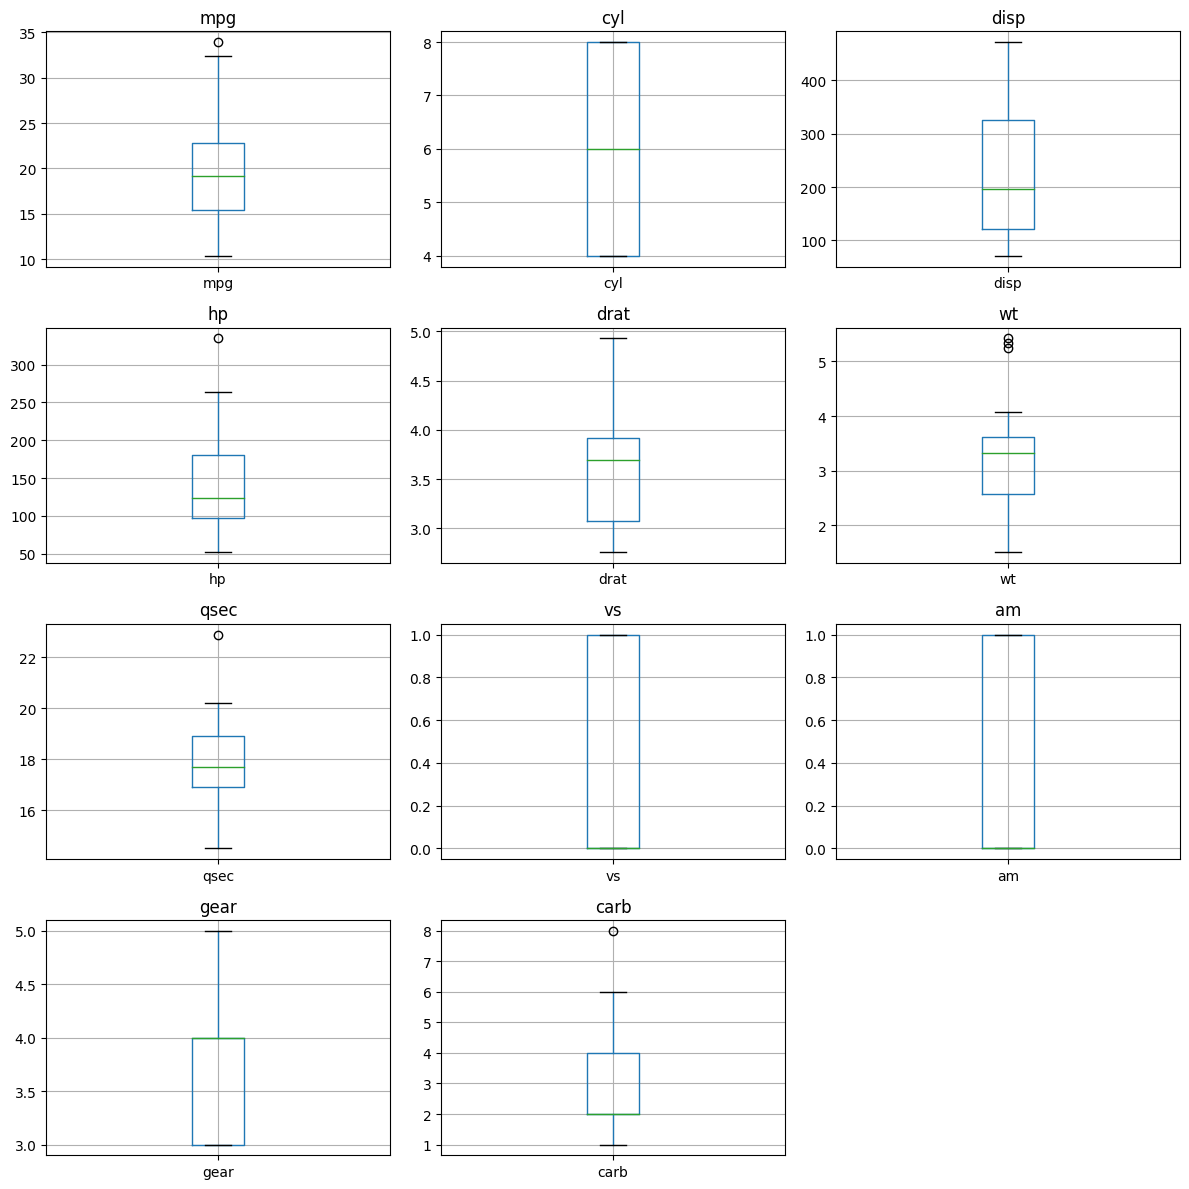

In [12]:
# 데이터 프레임의 열 수
num_columns = len(df.columns)

#그래프의 크기 설정
plt.figure(figsize=(12,12))

# 각 열에 대한 박스플롯을 그립니다.
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    df.boxplot(column = column)
    plt.title(column)

# 레이아웃을 조정
plt.tight_layout()
plt.show()

In [16]:
# 피벗 테이블 생성 - 변수간의 관계 확인시 (특히 파생변수)
pivot_table = df.pivot_table(values='hp', index='cyl', columns='gear', aggfunc='mean', fill_value=0)
print(pivot_table)

gear           3      4      5
cyl                           
4      97.000000   76.0  102.0
6     107.500000  116.5  175.0
8     194.166667    0.0  299.5


In [19]:
# 상관계수 행렬 계산
correlation_matrix = df.corr()
correlation_matrix

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [22]:
target_variable = 'mpg'
correlation_matrix[[target_variable]] # 대괄호 2개 = df, 한개 = series / 1개쓰면 칼럼이 없어지는거.

,mpg
mpg,1.000000
cyl,-0.852162
disp,-0.847551
hp,-0.776168
drat,0.681172
wt,-0.867659
qsec,0.418684
vs,0.664039
am,0.599832
gear,0.480285


In [28]:
# 타겟 변수와 상관관계가 높은 변수 선택 (절대값 기준으로 상위 n개 선택)
target_variable = 'mpg'
correlation_threshold = 0.5
correlation_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) >
                                                            correlation_threshold].index.tolist()

# 선택된 변수 출력
print(f'Variables highly correlated with {target_variable}: {correlation_features}')

Variables highly correlated with mpg: ['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'vs', 'am', 'carb']


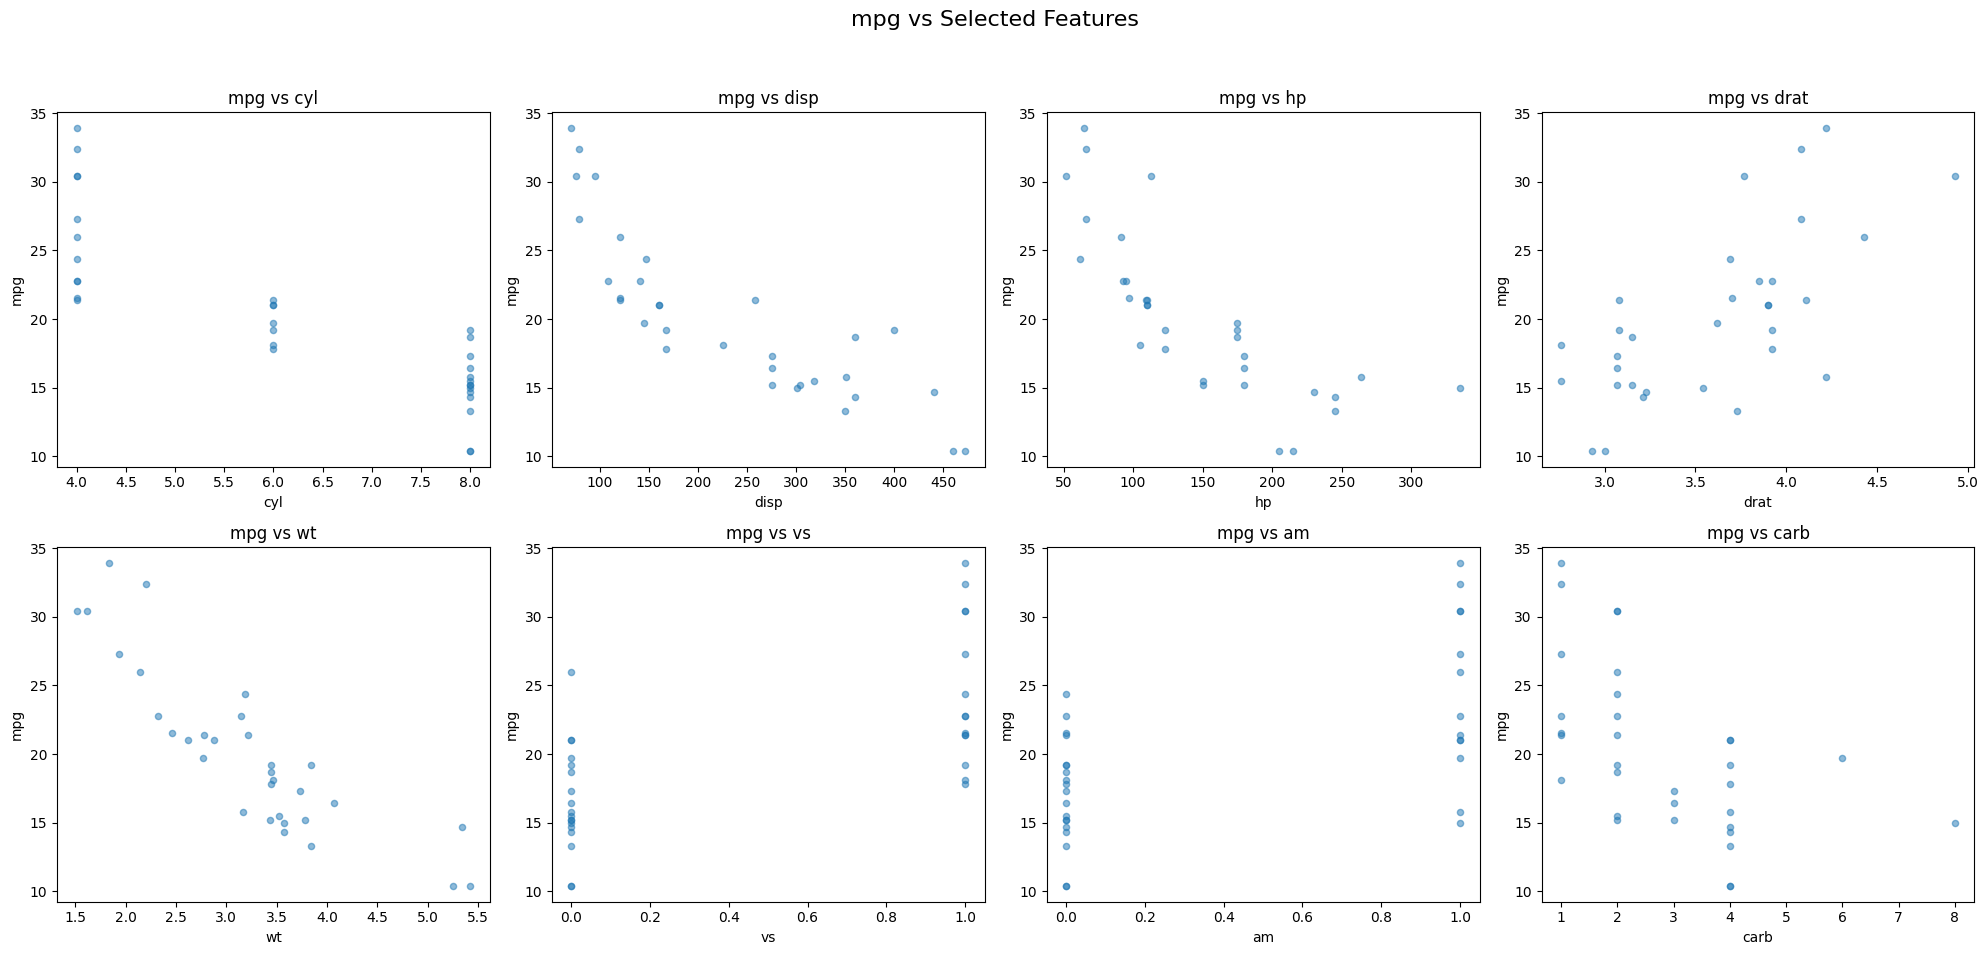

In [34]:
# 분석할 칼럼들
columns = ['cyl','disp','hp','drat','wt','vs','am','carb']
target = 'mpg'

# 2행 4열의 subplot 설정
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# 각 subplot에 산점도 그리기.
for i, col in enumerate(columns):
    row, col_idx = divmod(i,4) # 그래프 자리지정.
    df.plot(kind='scatter', x=col, y=target, ax=axes[row, col_idx], alpha=0.5)
    axes[row, col_idx].set_title(f'{target} vs {col}')
#전체 제목 설정
fig.suptitle(f'{target} vs Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler

correlated_features = [ 'mpg','disp', 'hp', 'drat', 'wt']
# 분석용 데이터셋 구축
analysis_df = df[correlated_features]
target_variable = 'mpg'
# 데이터셋 확인
print(analysis_df.head())

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(analysis_df.drop(columns=[target_variable]))

# 표준화된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_features, columns=analysis_df.columns.drop(target_variable))
scaled_df[target_variable] = analysis_df[target_variable].values

# 데이터셋 확인
print(scaled_df.head())

                    mpg   disp   hp  drat     wt
Mazda RX4          21.0  160.0  110  3.90  2.620
Mazda RX4 Wag      21.0  160.0  110  3.90  2.875
Datsun 710         22.8  108.0   93  3.85  2.320
Hornet 4 Drive     21.4  258.0  110  3.08  3.215
Hornet Sportabout  18.7  360.0  175  3.15  3.440
       disp        hp      drat        wt   mpg
0 -0.579750 -0.543655  0.576594 -0.620167  21.0
1 -0.579750 -0.543655  0.576594 -0.355382  21.0
2 -1.006026 -0.795570  0.481584 -0.931678  22.8
3  0.223615 -0.543655 -0.981576 -0.002336  21.4
4  1.059772  0.419550 -0.848562  0.231297  18.7
